In [1]:
# Install TensorFlow

!pip install -q  tensorflow-gpu==2.15.0
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.15.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.15.0
2.15.0


In [2]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model


In [3]:
# Looad in the data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)

170498071/170498071 [==============================] - 3s 0us/step
x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build model using functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
# x = Conv2d(128, (3,3), strides=2, activation='relu')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)







In [6]:
# Compile
# Note: Make sure your using GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Fit
r = model.fit(x_train[:30], y_train[:30], validation_data=(x_test[:30], y_test[:30]), epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 466ms/step - loss: 0.2942 - accuracy: 0.9000 - val_loss: 0.4592 - val_accuracy: 0.8667
Epoch 2/10
1/1 [==============================] - 0s 497ms/step - loss: 0.2226 - accuracy: 0.9667 - val_loss: 0.4689 - val_accuracy: 0.8667
Epoch 3/10
1/1 [==============================] - 1s 771ms/step - loss: 0.1408 - accuracy: 1.0000 - val_loss: 0.4830 - val_accuracy: 0.8333
Epoch 4/10
1/1 [==============================] - 1s 646ms/step - loss: 0.1216 - accuracy: 1.0000 - val_loss: 0.4960 - val_accuracy: 0.8333
Epoch 5/10
1/1 [==============================] - 1s 616ms/step - loss: 0.0839 - accuracy: 1.0000 - val_loss: 0.5077 - val_accuracy: 0.8333
Epoch 6/10
1/1 [==============================] - 1s 630ms/step - loss: 0.0547 - accuracy: 1.0000 - val_loss: 0.5185 - val_accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 1s 585ms/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 0.5282 - val_accuracy: 0.8000
Epoch 8/10
1/1 [====

In [22]:
# Fit with data augmentation
# Note: if you run this After calling the previous model model.fit(), it will CONTINUE training where it left off
batch_size = 10
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train[:30], y_train[:30], batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data= (x_test[:30], y_test[:30]), steps_per_epoch=steps_per_epoch, epochs=100)

<ipython-input-22-7ffad4faab14>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data= (x_test[:30], y_test[:30]), steps_per_epoch=steps_per_epoch, epochs=100)


Epoch 1/100
   3/5000 [..............................] - ETA: 15:41 - loss: 1.3510 - accuracy: 0.6667

5000/5000 [==============================] - 1s 166us/step - loss: 1.3510 - accuracy: 0.6667 - val_loss: 2.9359 - val_accuracy: 0.2333


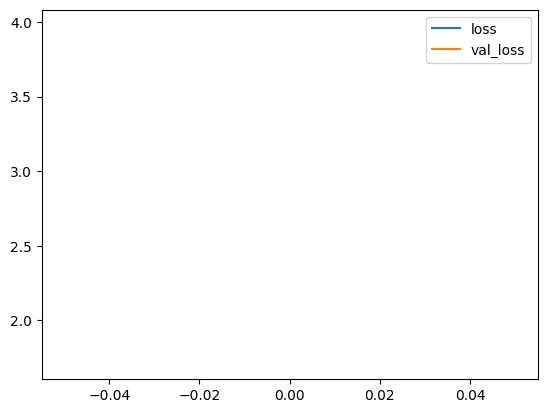

In [19]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

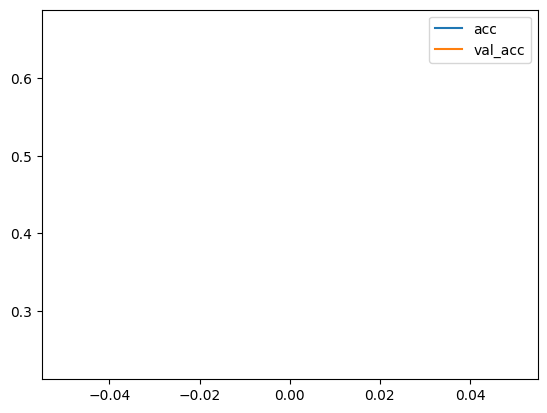

In [23]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

313/313 [==============================] - 25s 80ms/step
Confusion matrix without normalization
[[ 66  59 266 123   5   0  29   0 226 226]
 [ 43 275  65 138   0   1  20   0  46 412]
 [ 43  11 288 417   7   0  22   1  26 185]
 [ 20  11 122 480   5   0  15   0  10 337]
 [  9  18 190 577   4   0   6   2  17 177]
 [ 28  12 170 520   3   0  26   1   7 233]
 [  5  10 112 366   1   0  32   0   4 470]
 [ 35  48 178 342   8   1  20  17   6 345]
 [ 36  50 200 183   0   0  15   0 300 216]
 [ 20 115  64  62   0   0   8   0  34 697]]


TypeError: 'range' object cannot be interpreted as an integer

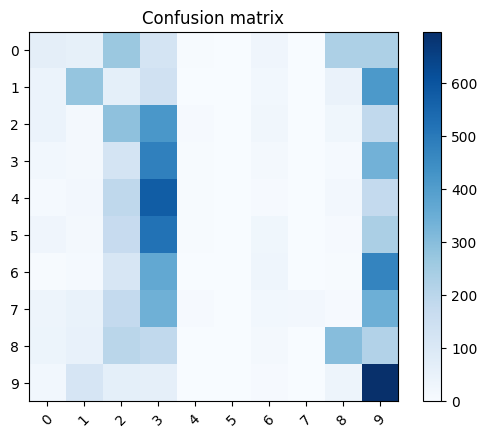

In [24]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '0.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0], range(cm.shape[1]))):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [25]:
# label mapping
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck '''.split()

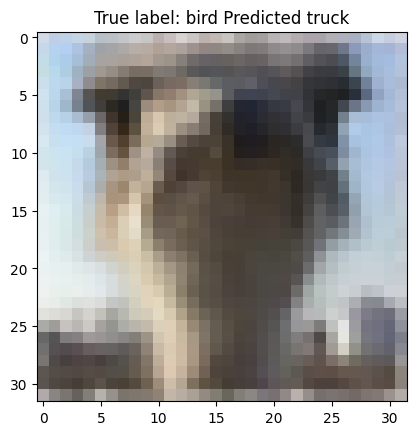

In [26]:
# Show some misclassfied examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted %s" % (labels[y_test[i]], labels[p_test[i]]));

In [27]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     